<a href="https://colab.research.google.com/github/Rishabh786Singh/Autoencoders/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist

# **Utility Functions**

In [0]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_title('Reconstructed ')
    plt.show()

Found it from the blog on medium and found its implementation very attractive .So,I decided to use it and know about its functioning.

# **DEEP AUTOENCODER**

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train[0].shape)))
x_test = x_test.reshape((len(x_test), np.prod(x_test[0].shape)))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
input_size = 784
hidden_size1 = 256
hidden_size2 = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size1, activation='relu')(input_img)
hidden_2=Dense(hidden_size2,activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_2)
hidden_3 = Dense(hidden_size2, activation='relu')(code)
hidden_4 = Dense(hidden_size1,activation='relu')(hidden_3)
output_img = Dense(input_size, activation='sigmoid')(hidden_4)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=15)

W0819 09:55:25.119204 139904139470720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 09:55:25.152159 139904139470720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 09:55:25.158273 139904139470720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 09:55:25.235799 139904139470720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 09:55:25.257026 139904139470720 deprecation_wrappe

Epoch 1/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.1373
Epoch 2/15
60000/60000 [==============================] - 8s 135us/step - loss: 0.0996
Epoch 3/15
60000/60000 [==============================] - 8s 129us/step - loss: 0.0926
Epoch 4/15
60000/60000 [==============================] - 8s 128us/step - loss: 0.0894
Epoch 5/15
60000/60000 [==============================] - 8s 131us/step - loss: 0.0874
Epoch 6/15
60000/60000 [==============================] - 8s 130us/step - loss: 0.0860
Epoch 7/15
60000/60000 [==============================] - 8s 129us/step - loss: 0.0849
Epoch 8/15
60000/60000 [==============================] - 8s 128us/step - loss: 0.0843
Epoch 9/15
60000/60000 [==============================] - 8s 128us/step - loss: 0.0838
Epoch 10/15
60000/60000 [==============================] - 8s 127us/step - loss: 0.0833
Epoch 11/15
60000/60000 [==============================] - 8s 127us/step - loss: 0.0829
Epoch 12/15
60000/60000 [===============

Note that all the layers use the relu activation function, as it’s the standard with deep neural networks. The last layer uses the sigmoid activation because we need the outputs to be between [0, 1]. The input is also in the same range.

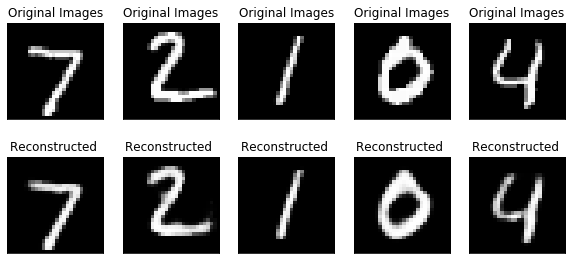

In [7]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

First row is the original image while 2nd row is their predicted versions

# **Shallow AutoEncoder**

In [8]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

shallow_autoencoder = Model(input_img, output_img)
shallow_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
shallow_autoencoder.fit(x_train, x_train, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.1616
Epoch 2/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.1043
Epoch 3/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0964
Epoch 4/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0951
Epoch 5/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0947
Epoch 6/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0944
Epoch 7/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0943
Epoch 8/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0941
Epoch 9/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0940
Epoch 10/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0939
Epoch 11/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0938
Epoch 12/15
60000/60000 [===========================

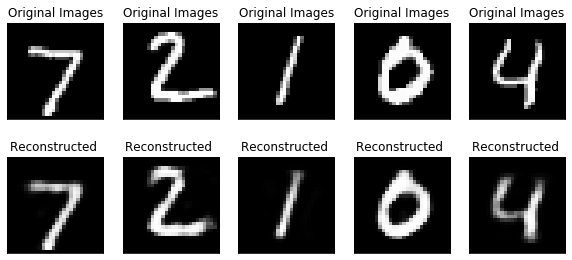

In [9]:
plot_autoencoder_outputs(shallow_autoencoder, 5, (28, 28))

Images by deep autoencoder is more clean and better as compare to shallow auto encoder but there is one disadvantage in deep autoencoder which is overfitting.

# Denoising AutoEncoder

In [0]:
def white_patch(y):#this function creates white patch just like tide washing powder
  x=np.reshape(y,[28,28]).copy()
  x[10:17,10:17]=1
  return x



In [38]:
noisy_X=[]
noisy_x_test=[]
for i in range(len(x_train)):
  noisy_X.append(white_patch(x_train[i]))
noisy_X=np.array(noisy_X).reshape(len(x_train),784)
for i in range(len(x_test)):
  noisy_x_test.append(white_patch(x_test[i]))
noisy_x_test=np.array(noisy_x_test).reshape(len(x_test),784)
print("Noisy train shape: ",noisy_X.shape)
print("Noisy test shape: ",noisy_x_test.shape)

Noisy train shape:  (60000, 784)
Noisy test shape:  (10000, 784)


## Utility function

In [0]:
def plot_noisy_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(noisy_x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(15, 7.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_title('noisy Images')

        # plot reconstruction 
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_title('Reconstructed ')
        
        ax = plt.subplot(3, n, i + 1+2*n)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_title('original Images')
    plt.show()

## Deep Noisy Auto Encoder

In [40]:
input_size = 784
hidden_size1 = 256
hidden_size2 = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size1, activation='tanh')(input_img)
hidden_2=Dense(hidden_size2,activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_2)
hidden_3 = Dense(hidden_size2, activation='relu')(code)
hidden_4 = Dense(hidden_size1,activation='tanh')(hidden_3)
output_img = Dense(input_size, activation='sigmoid')(hidden_4)

noisy_autoencoder = Model(input_img, output_img)
noisy_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
noisy_autoencoder.fit(noisy_X, x_train, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.1859
Epoch 2/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.1206
Epoch 3/30
60000/60000 [==============================] - 8s 130us/step - loss: 0.1073
Epoch 4/30
60000/60000 [==============================] - 8s 128us/step - loss: 0.1016
Epoch 5/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0985
Epoch 6/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0965
Epoch 7/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.0950
Epoch 8/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.0939
Epoch 9/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0931
Epoch 10/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0922
Epoch 11/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.0917
Epoch 12/30
60000/60000 [================

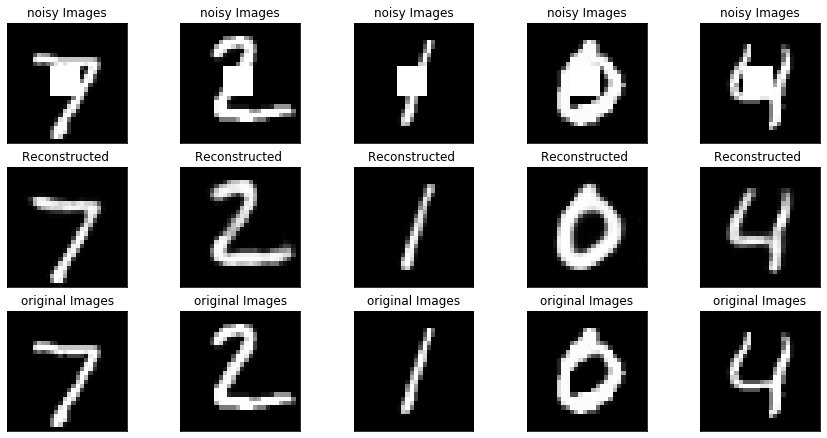

In [41]:
 plot_noisy_autoencoder_outputs(noisy_autoencoder,5,(28,28))

## Shallow noisy AutoEncoder

In [43]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

shallow_autoencoder = Model(input_img, output_img)
shallow_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
shallow_autoencoder.fit(noisy_X, x_train, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.1598
Epoch 2/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1117
Epoch 3/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.1081
Epoch 4/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1072
Epoch 5/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.1068
Epoch 6/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1066
Epoch 7/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.1064
Epoch 8/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1063
Epoch 9/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1062
Epoch 10/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1061
Epoch 11/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1060
Epoch 12/30
60000/60000 [==========================

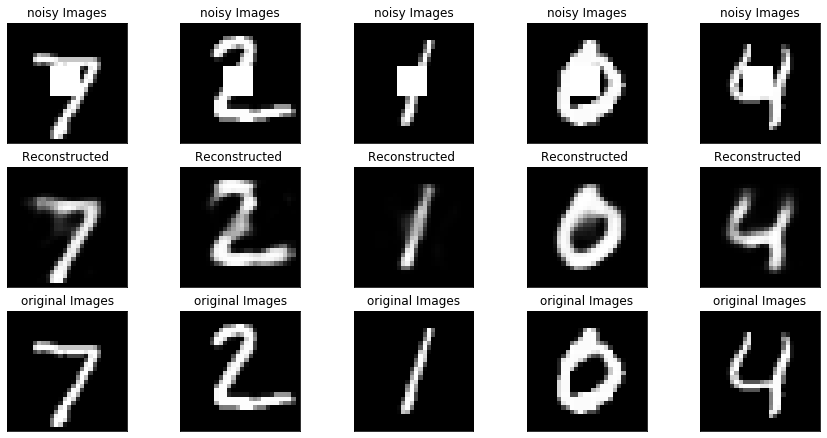

In [44]:
 plot_noisy_autoencoder_outputs(shallow_autoencoder,5,(28,28))